Loaded model from disk
Found 7178 images belonging to 7 classes.


C:\Users\Deepanshu\AppData\Local\Temp\ipykernel_6832\2214643010.py:32: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


-----------------------------------------------------------------
[[106  17 121 245 166 180 123]
 [ 10   0   8  32  23  22  16]
 [113   8 142 264 195 197 105]
 [191  20 211 487 317 343 205]
 [134  10 171 330 204 244 140]
 [125  20 166 331 221 240 144]
 [108  11  96 203 156 155 102]]


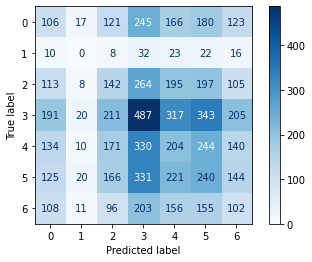

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.13      0.11      0.12       958
           1       0.00      0.00      0.00       111
           2       0.16      0.14      0.15      1024
           3       0.26      0.27      0.27      1774
           4       0.16      0.17      0.16      1233
           5       0.17      0.19      0.18      1247
           6       0.12      0.12      0.12       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.18      0.18      0.18      7178



In [1]:
import numpy as np
from keras.models import model_from_json
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay


emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

# load json and create model
json_file = open('model/emotion_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
emotion_model = model_from_json(loaded_model_json)

# load weights into new model
emotion_model.load_weights("model/emotion_model.h5")
print("Loaded model from disk")

# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# do prediction on test data
predictions = emotion_model.predict_generator(test_generator)

# see predictions
# for result in predictions:
#     max_index = int(np.argmax(result))
#     print(emotion_dict[max_index])

print("-----------------------------------------------------------------")
# confusion matrix
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
print(c_matrix)
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))